<a href="https://colab.research.google.com/github/robertoarturomc/Data_Science/blob/master/3_Tipos_de_Graficos_Barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Tipos de Graficos
## Variables Categoricas

Vamos a empezar a conocer los distintos tipos de Graficos que podemos usar. Esta es solamente una muestra; hay algunos graficos mas complejos, menos populares, o que aun no han sido creados. Los que sí te presentaré hoy tienen algo en comun: sirven, sobretodo, para variables categoricas.

Y, a todo esto, **¿que es una variable categórica?**

Es aquella que solamente puede tomar un número limitado de valores.
Normalmente, contienen informacion cualitativa (es decir, que _describe_ cualidades). O, si tienen información numérica, estos suelen ser valores que, en realidad, representan informacion cualitativa (aunque no necesariamente). Por ejemplo:

* Genero
* Nacionalidad
* Ciudad
* Marca
* Continente
* Urbano/Rural
* Deudor/Pagador.

En los ultimos ejemplos, cuando solo tenemos dos categorias, tambien podemos llamarlas variables **binarias.**


In [5]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Trabajaremos con el dataset "Titanic" que muestra informacion sobre algunos de sus pasajeros. ¿Puedes identificar las variables categoricas?

**TIP:** Normalmente, en pandas, las variables categoricas se guardan como `object`, que es el equivalente de `string`. En R, lo ideal es que esten como `Factor`, que es otro nombre para este tipo de features.

Las binarias suelen ser `bool` (booleanas)



In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## Grafico de Barras (Columnas)

Es de las visualizaciones de datos más familiares de entender. La longitud o la altura de las barras rectangulares representa el valor de sus datos. 

Los gráficos de barras se encuentran en la parte superior de la lista de clasificaciones de percepción para el espectador. Con rectángulos sentados en el mismo
eje, es fácil comparar los valores de forma rápida y precisa. Los gráficos de barras también son fáciles de
hacer.

En Matplotlib, el codigo basico es:

```
plt.bar( <categoria>, <valor numerico>)
```



In [17]:
clase = df.groupby("class")[["survived"]].count()
clase

,survived
class,
First,216
Second,184
Third,491


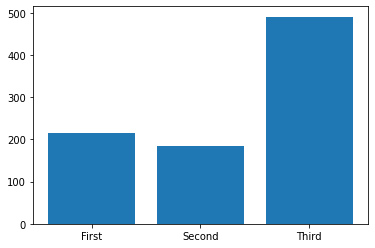

In [19]:
# Nota: si usé un groupby, debo usar .index como primer argumento.

plt.bar(clase.index, clase["survived"])
plt.show()

¡Esta bastante claro donde habian mas pasajeros!

Lastima que la utilidad de los _barcharts_ se pierde un poco cuando hay demasiadas categorias...

In [22]:
tarifa = df.groupby("fare")[["survived"]].count()
tarifa

,survived
fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


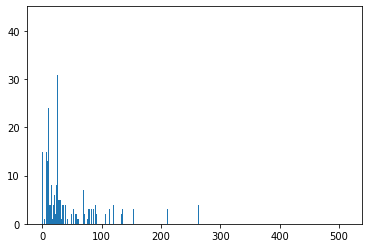

In [24]:
plt.bar(tarifa.index, tarifa["survived"])
plt.show()

,Type 1,Speed
0,Bug,61.681159
1,Dark,76.161290
2,Dragon,83.031250
3,Electric,84.500000
4,Fairy,48.588235
5,Fighting,66.074074
6,Fire,74.442308
7,Flying,102.500000
8,Ghost,64.343750
9,Grass,61.928571


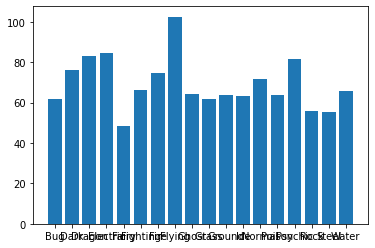

In [33]:
df2=pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

tipo1 = df2.groupby("Type 1").mean().reset_index()
display(tipo1[["Type 1", "Speed"]])

plt.bar(tipo1["Type 1"], tipo1["Speed"])
plt.show()
     

En ambos casos, cuesta muchisimo distinguir las categorias. Pero siempre puedo:

a) Limitar el numero de datos a mostrar.

,Type 1,Speed
0,Bug,61.681159
1,Dark,76.161290
2,Dragon,83.031250
3,Electric,84.500000
4,Fairy,48.588235
5,Fighting,66.074074
6,Fire,74.442308
7,Flying,102.500000


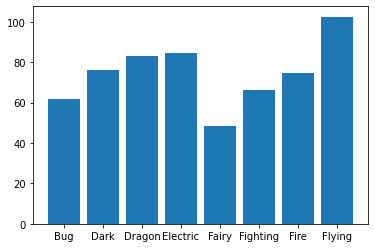

In [32]:
tipo1 = df2.groupby("Type 1").mean().reset_index()

# Solo tomo en cuenta los primeros 8 renglones
tipo1 = tipo1.head(8)

display(tipo1[["Type 1", "Speed"]])

plt.bar(tipo1["Type 1"], tipo1["Speed"])
plt.show()
     

O mejor aun,

b) Usar un grafico de barras **horizontal**

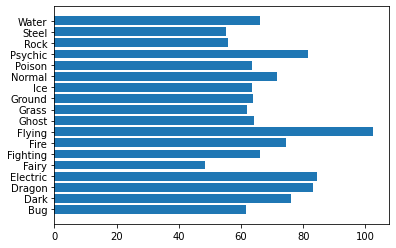

In [36]:
tipo1 = df2.groupby("Type 1").mean().reset_index()

plt.barh(tipo1["Type 1"], tipo1["Speed"])
plt.show()

Nota: tambien podria haber agregado mejores etiquetas en el eje X, pero esa es oootra historia.

Otra variante es el **Grafico Lollipop**

In [54]:
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
y = np.linspace(1, (np.log(0.2 * np.pi)), 10)
y

array([ 1.        ,  0.83725466,  0.67450933,  0.51176399,  0.34901865,
        0.18627332,  0.02352798, -0.13921735, -0.30196269, -0.46470803])

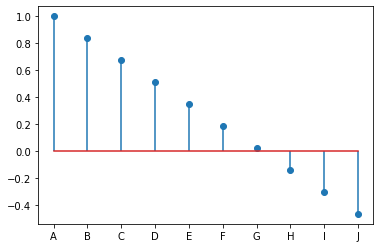

In [53]:
plt.stem(x, y, use_line_collection = True)
plt.show()

`use_line_collection=True` es solo para remover una advertencia.

### Graficos de Barras para mas de una categoria.

Cuando tengo mas de una categoria, es posible incluirlas en un grafico de barras. Si lo que me interesa es comparar los valores absolutos dentro de cada categoria, lo mas recomendable es hacer un grafico lado a lado.

In [69]:
male = df[df["sex"]=="male"]
female = df[df["sex"]=="female"]

clase_M = male.groupby("class")[["survived"]].count()
clase_F = female.groupby("class")[["survived"]].count()

clase_F

,survived
class,
First,94
Second,76
Third,144


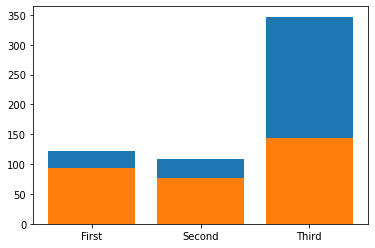

In [73]:
plt.bar(clase_M.index, clase_M["survived"])
plt.bar(clase_F.index, clase_F["survived"])

plt.show()

¡Los datos estan sobrepuestos!

Esto, porque utilizan el mismo valor en el eje X. Entonces, para corregirlo, podemos cambiar los valores de alguna de las categorias de Genero. Un truco comun es cambiar los valores en X por datos numericos.

In [76]:
np.arange(3) * 2

array([0, 2, 4])

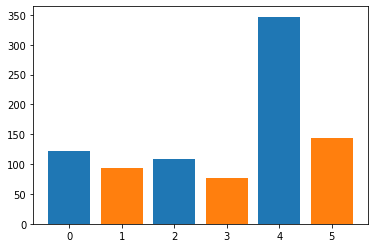

In [80]:
plt.bar(np.arange(3) * 2, clase_M["survived"])
plt.bar(np.arange(3) * 2 + 1, clase_F["survived"])

plt.show()

O mejor aun, cambio los `tick_label` (tick = las "lineas" que dividen el eje X)

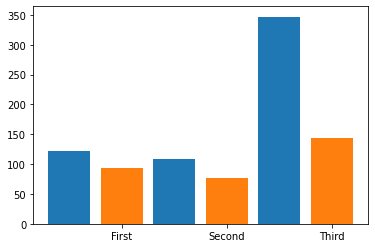

In [84]:
plt.bar(np.arange(3) * 2, clase_M["survived"], tick_label=clase_M.index)
plt.bar(np.arange(3) * 2 + 1, clase_F["survived"], tick_label=clase_M.index)

plt.show()

Seguro se te ocurren mil ideas para mejorar el grafico: agregar titulos, un cuadro de leyendas, etc. Esas las iremos viendo poco a poco.

#### Titulos de Grafico:

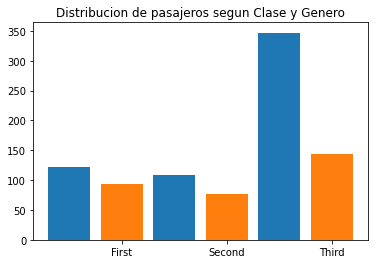

In [85]:
plt.bar(np.arange(3) * 2, clase_M["survived"], tick_label=clase_M.index)
plt.bar(np.arange(3) * 2 + 1, clase_F["survived"], tick_label=clase_M.index)

## Despues del codigo que especifica que grafico, pero antes del plt.show()
plt.title("Distribucion de pasajeros segun Clase y Genero")

plt.show()